In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [5]:
(X_train,Y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(x_test)

10000

In [8]:
X_train[1].shape

(28, 28)

In [9]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

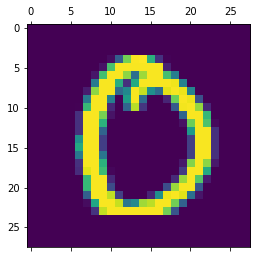

In [10]:
plt.matshow(X_train[88])

In [11]:
Y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train=X_train/255
x_test=x_test/255

In [29]:
X_flattend=X_train.reshape(len(X_train),28*28)
x_flattend=x_test.reshape(len(x_test),28*28)

In [30]:
X_flattend.shape
x_flattend.shape

(10000, 784)

In [31]:
X_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_flattend, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4832 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9262


In [34]:
model.evaluate(x_flattend,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9253


[0.267818808555603, 0.9253000020980835]

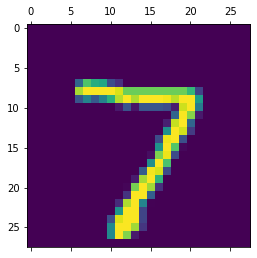

In [36]:
plt.matshow(x_test[0])

In [38]:
y_predict=model.predict(x_flattend)
y_predict[0]

array([1.4709121e-05, 1.0789553e-10, 4.0702951e-05, 9.2710257e-03,
       1.3139962e-06, 7.1877701e-05, 8.9971830e-10, 7.7792275e-01,
       9.6602918e-05, 6.1729550e-04], dtype=float32)

In [40]:
np.argmax(y_predict[0])

7

In [41]:
y_predictlabels=[np.argmax(i) for i in y_predict]
y_predictlabels[:5]

[7, 2, 1, 0, 4]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [44]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predictlabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    4,    2,    3,    0],
       [   0, 1105,    4,    2,    0,    1,    4,    2,   17,    0],
       [   3,    8,  920,   16,    7,    4,   12,   11,   48,    3],
       [   2,    0,   17,  930,    0,   15,    2,   11,   27,    6],
       [   2,    1,    6,    1,  915,    0,    8,    4,   12,   33],
       [   9,    2,    4,   37,    8,  764,   12,    6,   45,    5],
       [  12,    3,    7,    1,    8,   12,  909,    2,    4,    0],
       [   1,    5,   22,   10,    7,    0,    0,  953,    5,   25],
       [   6,    5,    6,   17,    9,   17,    8,   11,  891,    4],
       [  10,    7,    1,   12,   29,    7,    0,   28,   12,  903]],
      dtype=int32)>

Text(0.5, 42.0, 'Predicted')

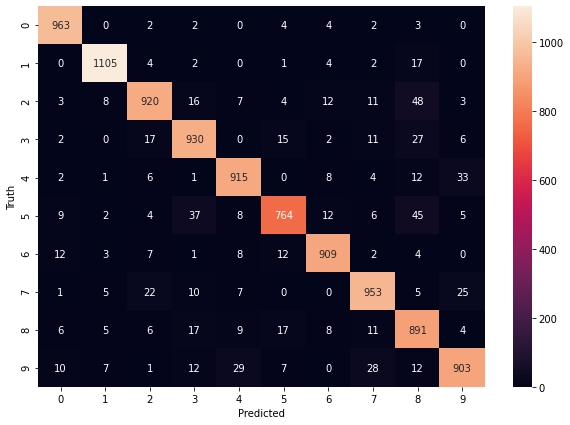

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.ylabel("Truth")
plt.xlabel("Predicted")


In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_flattend, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1008 - accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.9805


In [52]:
model.evaluate(x_flattend,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9730


[0.08490580320358276, 0.9729999899864197]

In [54]:
y_predict=model.predict(x_flattend)
y_predict[0]

array([4.0103313e-08, 1.4709499e-07, 1.3060411e-05, 7.0488453e-04,
       1.2781846e-09, 1.4865245e-07, 1.4940470e-09, 6.8650937e-01,
       7.4213960e-07, 1.2050125e-06], dtype=float32)

In [55]:
np.argmax(y_predict[0])


7

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predictlabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    4,    2,    3,    0],
       [   0, 1105,    4,    2,    0,    1,    4,    2,   17,    0],
       [   3,    8,  920,   16,    7,    4,   12,   11,   48,    3],
       [   2,    0,   17,  930,    0,   15,    2,   11,   27,    6],
       [   2,    1,    6,    1,  915,    0,    8,    4,   12,   33],
       [   9,    2,    4,   37,    8,  764,   12,    6,   45,    5],
       [  12,    3,    7,    1,    8,   12,  909,    2,    4,    0],
       [   1,    5,   22,   10,    7,    0,    0,  953,    5,   25],
       [   6,    5,    6,   17,    9,   17,    8,   11,  891,    4],
       [  10,    7,    1,   12,   29,    7,    0,   28,   12,  903]],
      dtype=int32)>